# Ischron Map for Oxnard
## Distance between residentials and toxic facilities

In [2]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

# to compare datasets, failed 
import numpy as np

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
#looking at Oxnard city and driving distance between toxic facilties and nearest residential areas
city = 'Oxnard, Ventura, CA, USA'
network_type = 'drive'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 1609 # googled avergae mph per minute and converted to meters 

In [4]:
%%time
# see how long it takes this cell to run 

# download the street network
G = ox.graph_from_address(city, network_type=network_type, dist = 2000)

CPU times: user 2.13 s, sys: 51.5 ms, total: 2.19 s
Wall time: 2.2 s


In [5]:
#what is graph is this?
type(G)

networkx.classes.multidigraph.MultiDiGraph

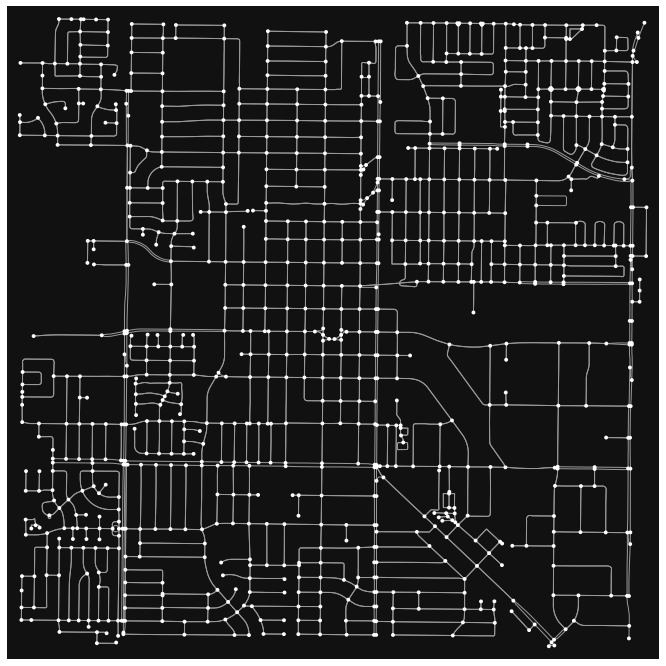

In [6]:
# plot using oxmnx
fig, ax = ox.plot_graph(G,figsize=(12,12))
#shows grid of oxnard

In [7]:
# project our network data to Web Mercator (measurements are in meters)
G = ox.project_graph(G, to_crs='epsg:3857')# epsg: 3857 is good to read longitude and latitude

In [8]:
# convert nodes and edges to geodataframes
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
#breaking graph into streat breakpoints or nodes and outline of streets or edges

In [9]:
gdf_nodes.sample(10)

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
95536639,4.053345e+06,-1.326521e+07,3,-119.163420,34.182586,NaN,POINT (-13265211.180 4053345.253)
95650201,4.055760e+06,-1.326543e+07,3,-119.165345,34.200532,NaN,POINT (-13265425.514 4055760.449)
95526263,4.054820e+06,-1.326827e+07,3,-119.190942,34.193541,NaN,POINT (-13268274.971 4054819.554)
95436642,4.056226e+06,-1.326703e+07,3,-119.179778,34.203990,NaN,POINT (-13267032.200 4056225.899)
95542819,4.055036e+06,-1.326926e+07,3,-119.199776,34.195149,NaN,POINT (-13269258.334 4055035.966)
95559556,4.053262e+06,-1.326773e+07,3,-119.186044,34.181965,NaN,POINT (-13267729.728 4053261.729)
95357346,4.055195e+06,-1.326651e+07,1,-119.175082,34.196331,NaN,POINT (-13266509.443 4055195.047)
95575159,4.055562e+06,-1.326794e+07,3,-119.187896,34.199055,NaN,POINT (-13267935.891 4055561.669)
95598229,4.053048e+06,-1.326764e+07,3,-119.185238,34.180376,NaN,POINT (-13267640.060 4053047.854)


In [10]:
gdf_nodes

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
95173394,4.053574e+06,-1.326540e+07,3,-119.165144,34.184283,NaN,POINT (-13265403.150 4053573.653)
95536640,4.053343e+06,-1.326496e+07,3,-119.161153,34.182571,NaN,POINT (-13264958.830 4053343.275)
95536637,4.053347e+06,-1.326540e+07,3,-119.165153,34.182596,NaN,POINT (-13265404.119 4053346.639)
95631603,4.053726e+06,-1.326540e+07,3,-119.165135,34.185415,NaN,POINT (-13265402.149 4053725.986)
95179730,4.056313e+06,-1.326772e+07,1,-119.185966,34.204636,NaN,POINT (-13267721.045 4056312.878)
...,...,...,...,...,...,...,...
6788695165,4.053861e+06,-1.326943e+07,1,-119.201324,34.186418,NaN,POINT (-13269430.634 4053861.001)
7273428930,4.057137e+06,-1.326870e+07,3,-119.194746,34.210758,NaN,POINT (-13268698.452 4057136.960)
7432299890,4.054804e+06,-1.326481e+07,3,-119.159798,34.193428,NaN,POINT (-13264808.092 4054804.319)


<AxesSubplot:>

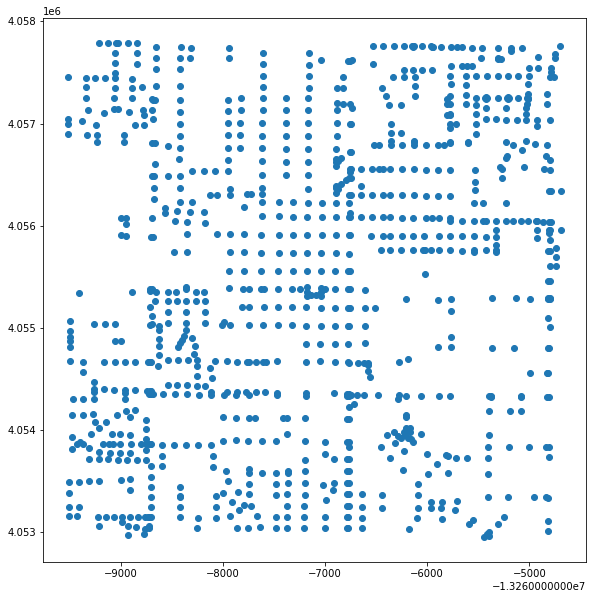

In [11]:
#plot nodes
gdf_nodes.plot(figsize=(10,10))

In [12]:
gdf_edges.head()

osmid                             name  \
u        v        key                                                          
95173394 95536640 0    [10738055, 10714703]  [Universe Circle, Beacon Place]   
         95536637 0                10739932                   Pacific Avenue   
         95631603 0                10739932                   Pacific Avenue   
95536640 95173394 0    [10714703, 10738055]  [Universe Circle, Beacon Place]   
         95536641 0               743170077                   Emerson Avenue   

                           highway  oneway   length  \
u        v        key                                 
95173394 95536640 0    residential   False  548.837   
         95536637 0       tertiary   False  187.589   
         95631603 0       tertiary   False  125.875   
95536640 95173394 0    residential   False  548.837   
         95536641 0       tertiary   False  101.574   

                                                                geometry  \
u        v        key                                                      
95173394 95536640 0    LINESTRING (-13265403.150 4053573.653, -132653...   
         95536637 0    LINESTRING (-13265403.150 4053573.653, -132654...   
         95631603 0    LINESTRING (-13265403.150 4053573.653, -132654...   
95536640 95173394 0    LINESTRING (-13264958.830 4053343.275, -132649...   
         95536641 0    LINESTRING (-13264958.830 4053343.275, -132649...   

                      lanes width junction bridge maxspeed  
u        v        key                                       
95173394 95536640 0     NaN   NaN      NaN    NaN      NaN  
         95536637 0     NaN   NaN      NaN    NaN      NaN  
         95631603 0     NaN   NaN      NaN    NaN      NaN  
95536640 95173394 0     NaN   NaN      NaN    NaN      NaN  
         95536641 0     NaN   NaN      NaN    NaN      NaN

<AxesSubplot:>

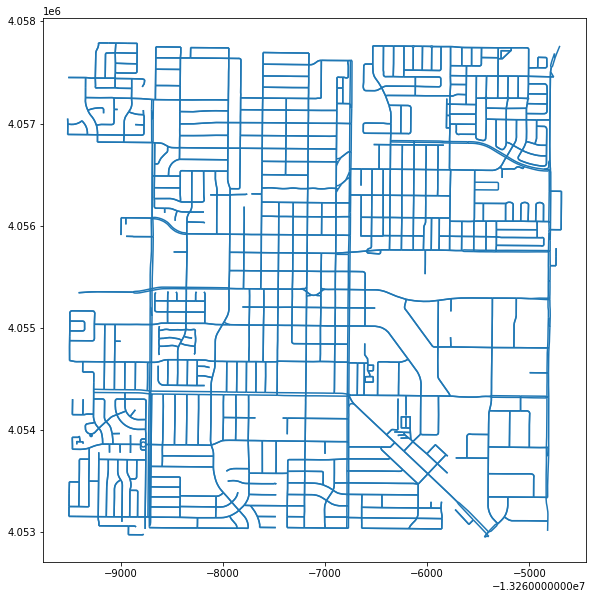

In [13]:
gdf_edges.plot(figsize=(10,10))

In [14]:
#only looking at roads
gdf_edges['highway'].value_counts()
#broke types of streets into categories, most streets are residential. I want to focus on those to identify residential areas

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


residential                    2038
tertiary                        401
secondary                       184
primary                          52
unclassified                     20
secondary_link                    8
primary_link                      6
tertiary_link                     4
[unclassified, residential]       2
Name: highway, dtype: int64

In [16]:
#import facilities csv
dftri=pd.read_csv('oxnard_trisummary2020.csv')

In [17]:
#show csv data
dftri
#dftri.columns

,Longitude,Latitude,Name,Address,Industry Sector
0,-119.183020,34.140350,New-Indy Oxnard LLC,"5936 Perkins Road, Oxnard, CA 93033",Paper
1,-119.168445,34.141707,Aluminum Precision Products INC,"1001 MC Wane Bouvelard, Oxnard, CA 93033",Fabricated Metals
2,-119.168110,34.196130,Cemex Oxnard Plant,"548 Diaz Avenue, Oxnard, CA 93030",Nonmetallic Mineral Product
3,-119.147180,34.198100,Parker Hannifin Corp,"2340 Eastman Ave, Oxnard, CA 93030",Machinery
4,-119.130352,34.205928,PTI Technologies Inc,"501 N Del Norte Boulevard, Oxnard, CA 93030",Transportation Equipment
5,-119.140427,34.209468,The Procter & Gamble Paper Product CO,"800 N Rice Avenue, Oxnard, CA 93030",Paper
6,-119.163291,34.249140,Southern Counties Oil CO LP DBA SC Fuels,"3815 East Vineyard Avenue, Oxnard, CA 93036",Petroleum Bulk Terminals
7,-119.129346,34.199354,Associated Ready Mixed Concrete Inc,"392 S. Del Norte Boulevard, Oxnard, CA 93030",Nonmetallic Mineral Product
8,-119.143053,34.270536,Vulcan Materials-Saticoy,"6029 Vineyard Avenue, Oxnard, CA 93030",Petroleum


In [18]:
# convert df to gdf
gdftri = gpd.GeoDataFrame(dftri, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(dftri.Longitude, dftri.Latitude)) 
#geometry put the longitude and latitide points together in new column as object types

In [19]:
gdftri

,Longitude,Latitude,Name,Address,Industry Sector,geometry
0,-119.183020,34.140350,New-Indy Oxnard LLC,"5936 Perkins Road, Oxnard, CA 93033",Paper,POINT (-119.18302 34.14035)
1,-119.168445,34.141707,Aluminum Precision Products INC,"1001 MC Wane Bouvelard, Oxnard, CA 93033",Fabricated Metals,POINT (-119.16845 34.14171)
2,-119.168110,34.196130,Cemex Oxnard Plant,"548 Diaz Avenue, Oxnard, CA 93030",Nonmetallic Mineral Product,POINT (-119.16811 34.19613)
3,-119.147180,34.198100,Parker Hannifin Corp,"2340 Eastman Ave, Oxnard, CA 93030",Machinery,POINT (-119.14718 34.19810)
4,-119.130352,34.205928,PTI Technologies Inc,"501 N Del Norte Boulevard, Oxnard, CA 93030",Transportation Equipment,POINT (-119.13035 34.20593)
5,-119.140427,34.209468,The Procter & Gamble Paper Product CO,"800 N Rice Avenue, Oxnard, CA 93030",Paper,POINT (-119.14043 34.20947)
6,-119.163291,34.249140,Southern Counties Oil CO LP DBA SC Fuels,"3815 East Vineyard Avenue, Oxnard, CA 93036",Petroleum Bulk Terminals,POINT (-119.16329 34.24914)
7,-119.129346,34.199354,Associated Ready Mixed Concrete Inc,"392 S. Del Norte Boulevard, Oxnard, CA 93030",Nonmetallic Mineral Product,POINT (-119.12935 34.19935)
8,-119.143053,34.270536,Vulcan Materials-Saticoy,"6029 Vineyard Avenue, Oxnard, CA 93030",Petroleum,POINT (-119.14305 34.27054)


<AxesSubplot:>

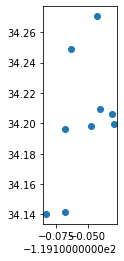

In [20]:
# plot facilities
gdftri.plot()

In [25]:
#Failed to make loop to look through both dataframes for matching coordinates!
#def analyze_tri(Latitude,Longitude):

    #call osmnx with a lat/long pair
    #G = ox.geometries_from_point((Latitude,Longitude),tags={'building':True},dist=200)
    
#create loop
#for index, row in gdftri.iteritems():
   
    #print(column.Latitude, column.Longitude)
    #call the function
    
#for (Longitude, Latitude) in dftri.iteritems():
    
    #point= (Longitude, Latitude)
    #print(point)
    


#create empty dataframe to compare coordinates in osm and csv
coord= pd.DataFrame()

coord
#data frame empty

""


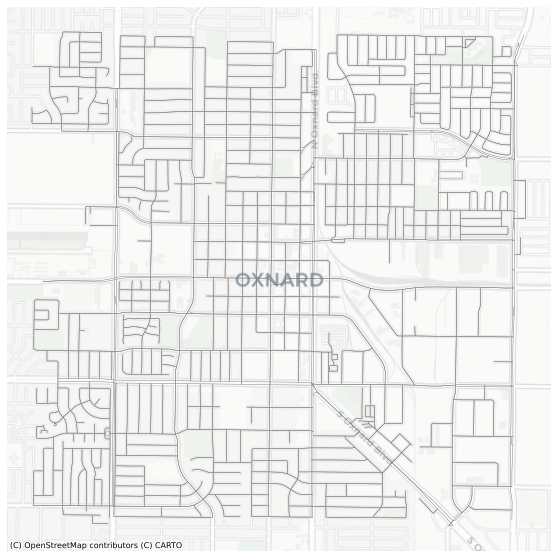

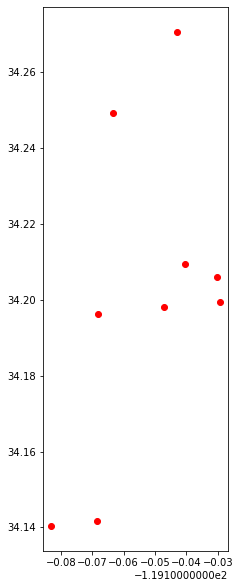

In [26]:
#failed to match coordinates of nodes and facilities coordinates!
#coord.assign(gdftri.geometry.isin(gdf_nodes.geometry).astype(object))
#coord.assign(coord=gdf_nodes.y.isin(gdftri.Longitude).astype(object))


#failed to create loop too to create column of just matching coordinates!
#for i in gdf_nodes.itertuples():
    #match = gdftri['geometry'] == gdf_nodes['geometry']
    #coord=coord.append(match)
    #coord
    
#set up two subplots one for the osm and the other for the coordinates on the csv of facilties
fig, ax = plt.subplots(figsize=(10,10))
fig1, ax1 = plt.subplots(figsize=(10,10))
# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax, keeping off to just show faciliites at this tie
#gdf_nodes.plot(ax=ax,markersize=2,zorder=20)

# add the faciltiy coordinates in red
gdftri.plot(ax=ax1,color='r', zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

# I trying to graph the coordinates of the facilities, instead of using centriods, on the graph wth edges. I kept running out of data and cannot see if it works. Possibly the two graphs are on two different axis measurements. If the graph were to work, the facilities would ask like the centeroids like in the class lab then I could create a Iscrhon map and compare distance to resdential areas. 